<a href="https://colab.research.google.com/github/grbarbosa3/Machine_learning/blob/master/Logistical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set_style()

df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

print("Tamanho de df: {}\n".format(df.shape))

Tamanho de df: (303, 14)



In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
#Instanciar e escolher os hyperparametros
model = LogisticRegression()

#Separar feature matrix e target vector

X = df.drop('num', axis=1)
y = df['num']

#Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Padronizar os dados de treino

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#fit do modelo 

model.fit(X_train, y_train)

# Fazer previsoes em cima de novos dados

X_test = scaler.transform(X_test)    # padronizar os dados de teste
y_pred = model.predict(X_test)



In [5]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.84      0.62      0.71        34

    accuracy                           0.78        76
   macro avg       0.79      0.76      0.76        76
weighted avg       0.79      0.78      0.77        76



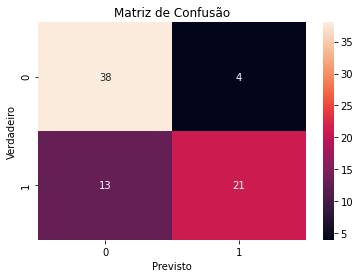

In [6]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [7]:

y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [0 0 0 1 0]

y_proba: 
 [[0.91038394 0.08961606]
 [0.86878259 0.13121741]
 [0.8145431  0.1854569 ]
 [0.37965138 0.62034862]
 [0.96460531 0.03539469]]
